In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("IRIS.csv")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
Species=data["species"].value_counts().reset_index()
Species

,species,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


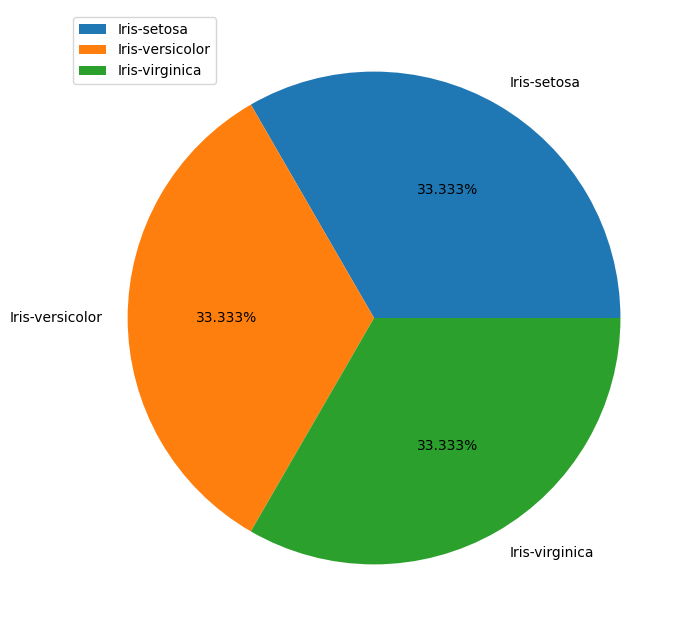

In [17]:
plt.figure(figsize=(8,8))
plt.pie(Species['count'],labels=['Iris-setosa','Iris-versicolor','Iris-virginica'],autopct='%1.3f%%',explode=[0,0,0])
plt.legend(loc='upper left')
plt.show()

In [18]:
data.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)

C:\Users\info tech sud\AppData\Local\Temp\ipykernel_4764\3570322813.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)


<Axes: >

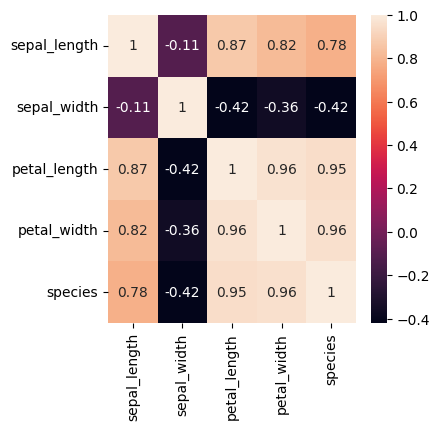

In [20]:
plt.figure(figsize=(4,4)) 
sns.heatmap(data.corr(),annot=True)

In [21]:
x = data[['petal_length','petal_width']]
y = data['species']

In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression #Imports the LogisticRegression class from Scikit-Learn
logreg=LogisticRegression() #Initializes an instance of LogisticRegression.
logreg.fit(x_train,y_train)

LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score
#accuracy on training data -Logistic regression
x_train_prediction=logreg.predict(x_train) #Predicts the target labels (y_train) using the logistic regression model (logreg) on the training features (x_train).
training_data_accuracy=accuracy_score(x_train_prediction,y_train) #Computes the accuracy score by comparing the predicted labels (x_train_prediction)
print('accuracy on training data:',training_data_accuracy)
#accuracy on test data
x_test_prediction=logreg.predict(x_test) #Predicts the target labels (y_test) using the logistic regression model (logreg) on the test features (x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test) #Computes the accuracy score by comparing the predicted labels (x_test_prediction) with the actual labels (y_test) from the test data.
print('accuracy on test data:',test_data_accuracy)

accuracy on training data: 0.9583333333333334
accuracy on test data: 0.9666666666666667


In [28]:
from sklearn.tree import DecisionTreeClassifier 
dtc=DecisionTreeClassifier().fit(x_train,y_train)

In [29]:
#accuracy on training data -Decision tree
x_train_prediction=dtc.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('accuracy on training data:',training_data_accuracy)
#accuracy on test data
x_test_prediction=dtc.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy on test data:',test_data_accuracy)

accuracy on training data: 0.9916666666666667
accuracy on test data: 0.9666666666666667


In [30]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier() 
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
#To train the classification model using the KNN algorithm:
x_train_prediction=knn.predict(x_train)
training_Data_accuracy=accuracy_score(x_train_prediction,y_train)
print("accuracy on training data:",training_data_accuracy)
#accuracy on test data
x_test_prediction=knn.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy on test data:',test_data_accuracy)

accuracy on training data: 0.9916666666666667
accuracy on test data: 1.0


In [32]:
import numpy as np
input_data=(5.0,2.0) #Provided input data from 3rd row from above table. Expected output is 2.
#changing input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)

In [33]:
#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [34]:
print('Prediction Model    |    PredictedValues')
prediction=logreg.predict(input_data_reshaped)
print('Logistic regression       ',prediction[0])
prediction=dtc.predict(input_data_reshaped)
print('Decision tree             ',prediction[0])
prediction=knn.predict(input_data_reshaped)
print('Knn                       ',prediction[0])


Prediction Model    |    PredictedValues
Logistic regression        2
Decision tree              2
Knn                        2
